<img src="../img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='procedureorderitems'></a>procedureorderitems table
The *procedureorderitems* table contains all orders for procedures and tasks, such drawing blood, perfforminroutine ICU nursing care and scoring. Please note that many of these tasks will lead to a result or observation, that can be found in the [freetextitems](freetextitems.ipynb#freetextitems), [listitems](listitems.ipynb#listitems) or [numericitems](numericitems.ipynb#numericitems) tables, depending on the type of documentation required. All items have an associated admissionid from the [admissions](admissions.ipynb#admissions) table.

## Fields

|Name|Type|Description|
|:---|:---|:---|
|admissionid|integer|links the items with the admissionid in the [admissions](admissions.ipynb#admissions) table|
|orderid|integer|unique number identifiying this order
|ordercategoryid|integer|id of procedure category 
|[ordercategoryname](#ordercategoryname)|string|name of procedure category
|itemid|integer|id of procedure name
|[item](#item)|string|procedure name
|registeredat|integer|time the result was stored in the database, expressed as milliseconds since the first ICU admission. 
|[registeredby](#registeredby)|string|user group that entered the result, e.g. nurses, physicians, etc.

# Example Python and SQL scripts

## Imports

In [1]:
%matplotlib inline
import amsterdamumcdb
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

## Display settings

In [2]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 288
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 1000

## Connection settings

In [3]:
#Modify config.ini in the root folder of the repository to change the settings to connect to your postgreSQL database
import configparser
import os
config = configparser.ConfigParser()

if os.path.isfile('../config.ini'):
    config.read('../config.ini')
else:
    config.read('../config.SAMPLE.ini')

#Open a connection to the postgres database:
con = psycopg2.connect(database=config['psycopg2']['database'], 
                       user=config['psycopg2']['username'], password=config['psycopg2']['password'], 
                       host=config['psycopg2']['host'], port=config['psycopg2']['port'])
con.set_client_encoding('WIN1252') #Uses code page for Dutch accented characters.
con.set_session(autocommit=True)

cursor = con.cursor()
cursor.execute('SET SCHEMA \'amsterdamumcdb\''); #set search_path to amsterdamumcdb schema

## Overview of all fields

In [4]:
sql = """
SELECT * FROM procedureorderitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)
df.head(10)

``` mysql

SELECT * FROM procedureorderitems

```

,admissionid,orderid,ordercategoryid,ordercategoryname,itemid,item,registeredat,registeredby
0,0,1994476,101,Opdr. Huid,12896,Decubitus score,22680000,ICV_IC-Verpleegkundig
1,0,1994479,73,Opdr. Laboratorium afname,9270,Bloedgas afnemen,22680000,ICV_IC-Verpleegkundig
2,0,1994480,73,Opdr. Laboratorium afname,9269,Lab. CCH-VAT T = 0,22680000,ICV_IC-Verpleegkundig
3,0,1994481,103,Opdr. Radiologie,7922,X-Thorax,22680000,ICV_IC-Verpleegkundig
4,0,1994482,81,Opdr. Circulatie,7921,ECG,22680000,ICV_IC-Verpleegkundig
5,0,1994566,73,Opdr. Laboratorium afname,9270,Bloedgas afnemen,27840000,ICV_IC-Verpleegkundig
6,0,1994567,73,Opdr. Laboratorium afname,9267,Lab. CCH-VAT T = 2,27840000,ICV_IC-Verpleegkundig
7,0,1994603,111,1. Stoppen/Wijzigen,9449,Opdr.\Proc. Stoppen,30900000,ICV_IC-Verpleegkundig
8,0,1994707,73,Opdr. Laboratorium afname,9270,Bloedgas afnemen,40500000,ICV_IC-Verpleegkundig
9,0,1994708,73,Opdr. Laboratorium afname,9268,Lab. CCH-VAT T = 6,40500000,ICV_IC-Verpleegkundig


In [5]:
df.describe()

,admissionid,orderid,ordercategoryid,itemid,registeredat
count,2.196116e+06,2.196116e+06,2.196116e+06,2.196116e+06,2.196116e+06
mean,1.172974e+04,4.129859e+06,8.835983e+01,1.191826e+04,6.592966e+09
std,6.722221e+03,2.186786e+06,1.036161e+01,3.075270e+03,2.905972e+10
min,0.000000e+00,7.000000e+00,7.300000e+01,7.921000e+03,-3.361800e+08
25%,6.094000e+03,2.249290e+06,8.200000e+01,9.377000e+03,1.996800e+08
50%,1.157200e+04,4.258046e+06,8.900000e+01,1.247300e+04,8.485800e+08
75%,1.756000e+04,6.057370e+06,9.000000e+01,1.302100e+04,2.430495e+09
max,2.355200e+04,7.660473e+06,1.160000e+02,2.124000e+04,3.916634e+11


## <a id='orderid'></a>orderid

In [6]:
sql = """
SELECT COUNT(*) AS "Number of unique observations" FROM (
    SELECT DISTINCT orderid
    FROM procedureorderitems
    ) as unique_items_table
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)
df

``` mysql

SELECT COUNT(*) AS "Number of unique observations" FROM (
    SELECT DISTINCT orderid
    FROM procedureorderitems
    ) as unique_items_table

```

,Number of unique observations
0,2196116


``` mysql

SELECT COUNT(admissionid) AS "procedures per admission"
FROM procedureorderitems
GROUP BY admissionid

```

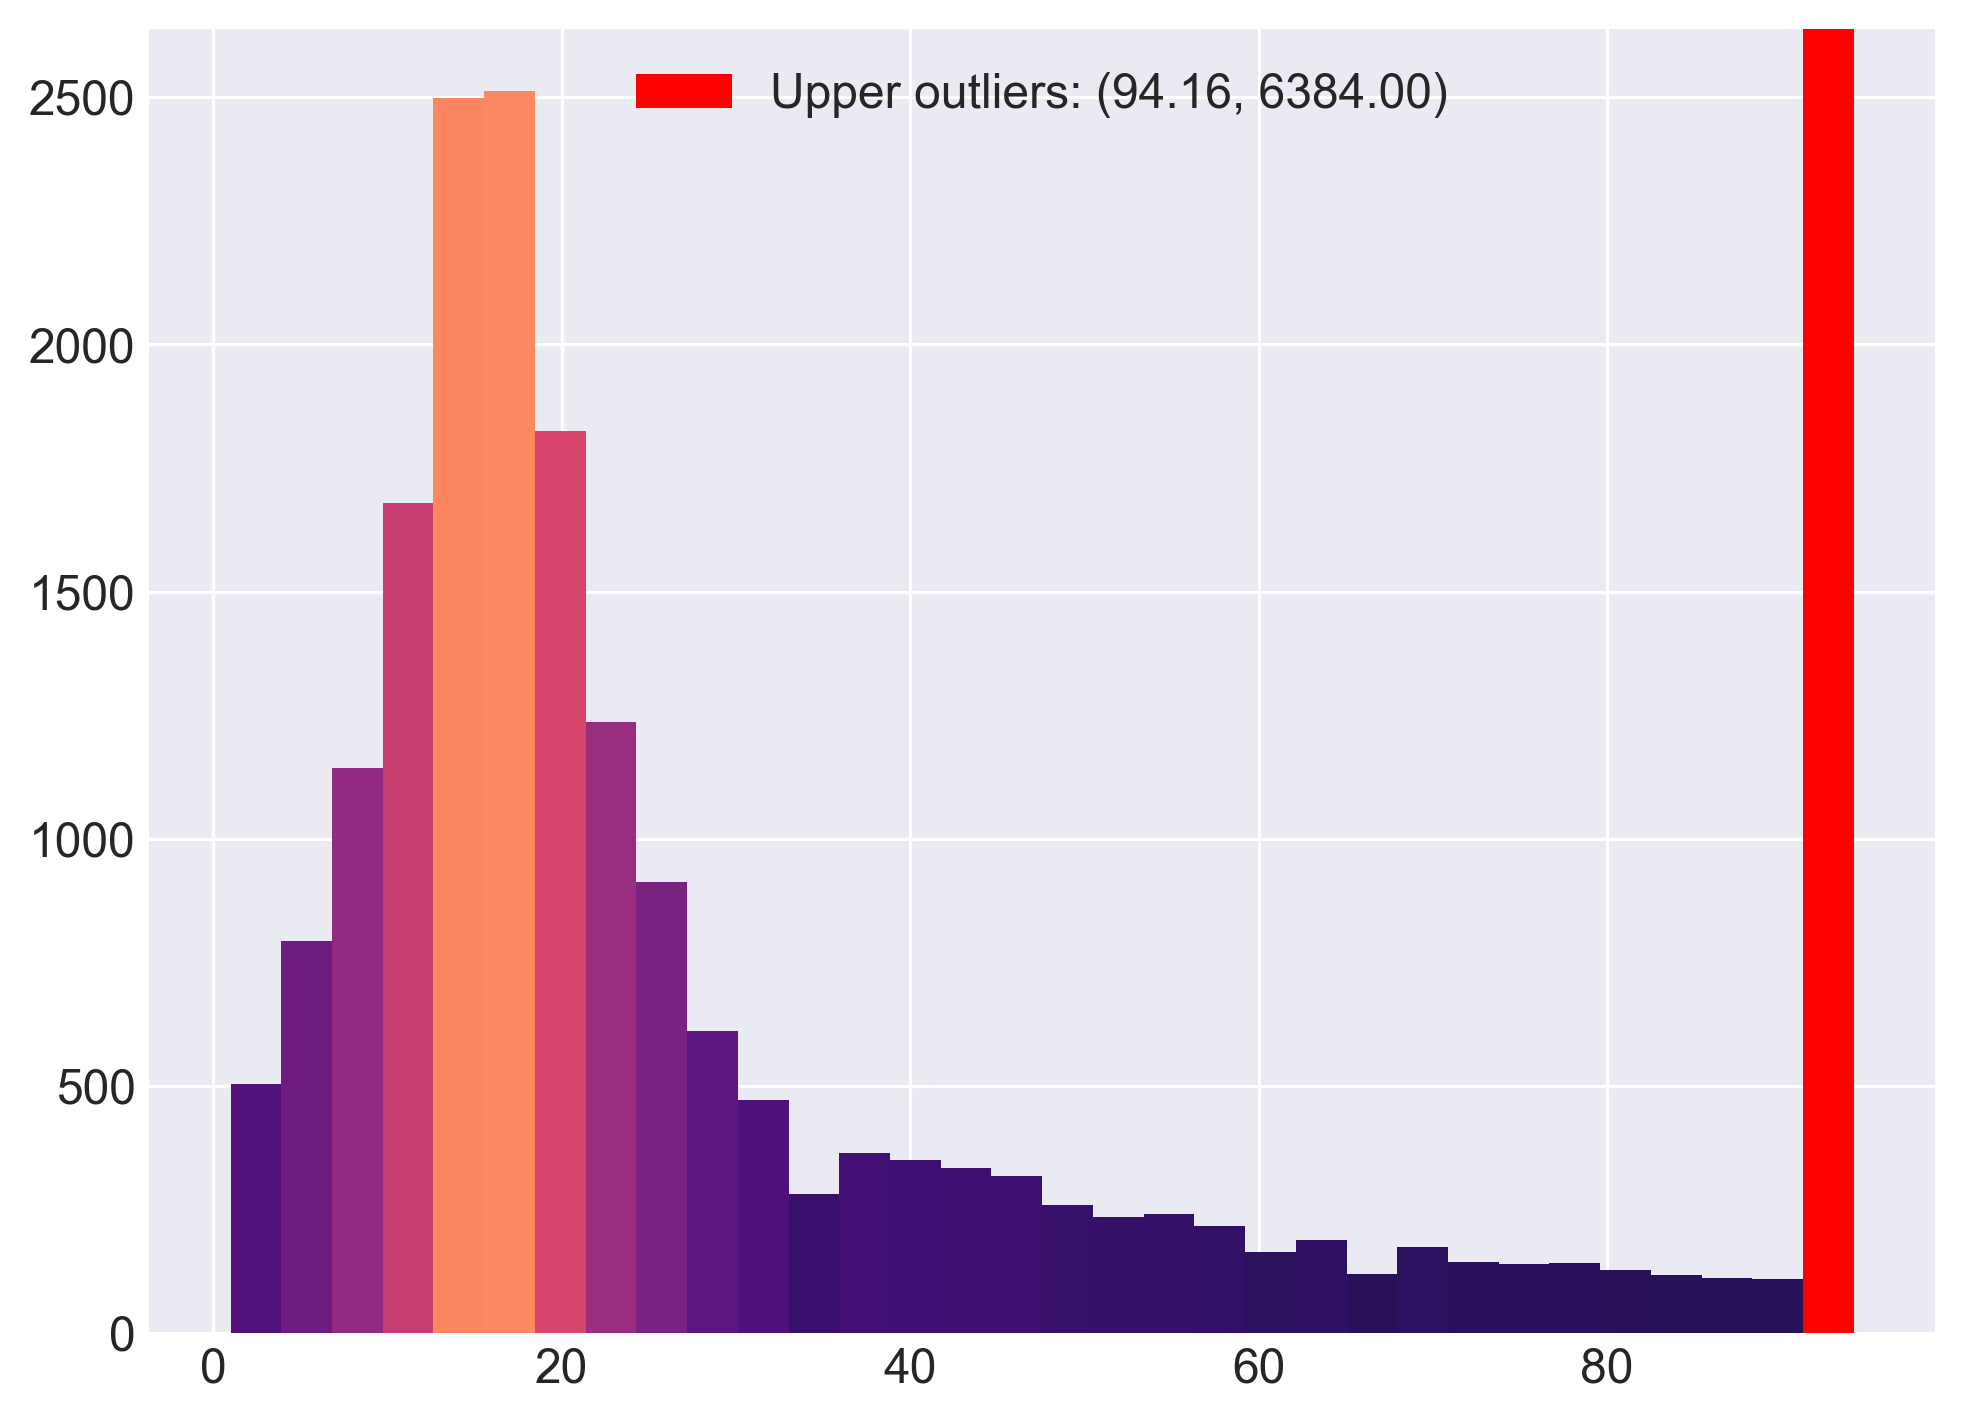

In [7]:
sql = """
SELECT COUNT(admissionid) AS "procedures per admission"
FROM procedureorderitems
GROUP BY admissionid
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)

#plot the data
data = df['procedures per admission']
amsterdamumcdb.outliers_histogram(data, bins=32).show()

## <a id='item'></a>item

In [8]:
sql = """
SELECT item, COUNT(item) AS "number of observations", itemid
FROM procedureorderitems
GROUP BY item, itemid
ORDER BY "number of observations" DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)
df.head(10)

``` mysql

SELECT item, COUNT(item) AS "number of observations", itemid
FROM procedureorderitems
GROUP BY item, itemid
ORDER BY "number of observations" DESC

```

,item,number of observations,itemid
0,Gantt-lijst controle,244068,13021
1,Wisselligging,173182,12771
2,Decubitus score,107956,12896
3,Hielen vrijleggen,106055,12839
4,Pijnscore bepalen,88467,19661
5,Glucose afnemen,73436,9547
6,Drukzak vernieuwen,69901,9287
7,Opdr.\Proc. wijzigen,67336,9452
8,Lab. dgs Standaard 6.00u,64962,9446
9,Opnieuw profiel monitor en alarmen instellen,47017,20393


## <a id='ordercategoryname'></a>ordercategoryname

``` mysql

SELECT ordercategoryname AS "Order Category", COUNT(ordercategoryname) AS "Number of tasks", ordercategoryid
FROM procedureorderitems
GROUP BY ordercategoryname, ordercategoryid
ORDER BY "Number of tasks" DESC

```

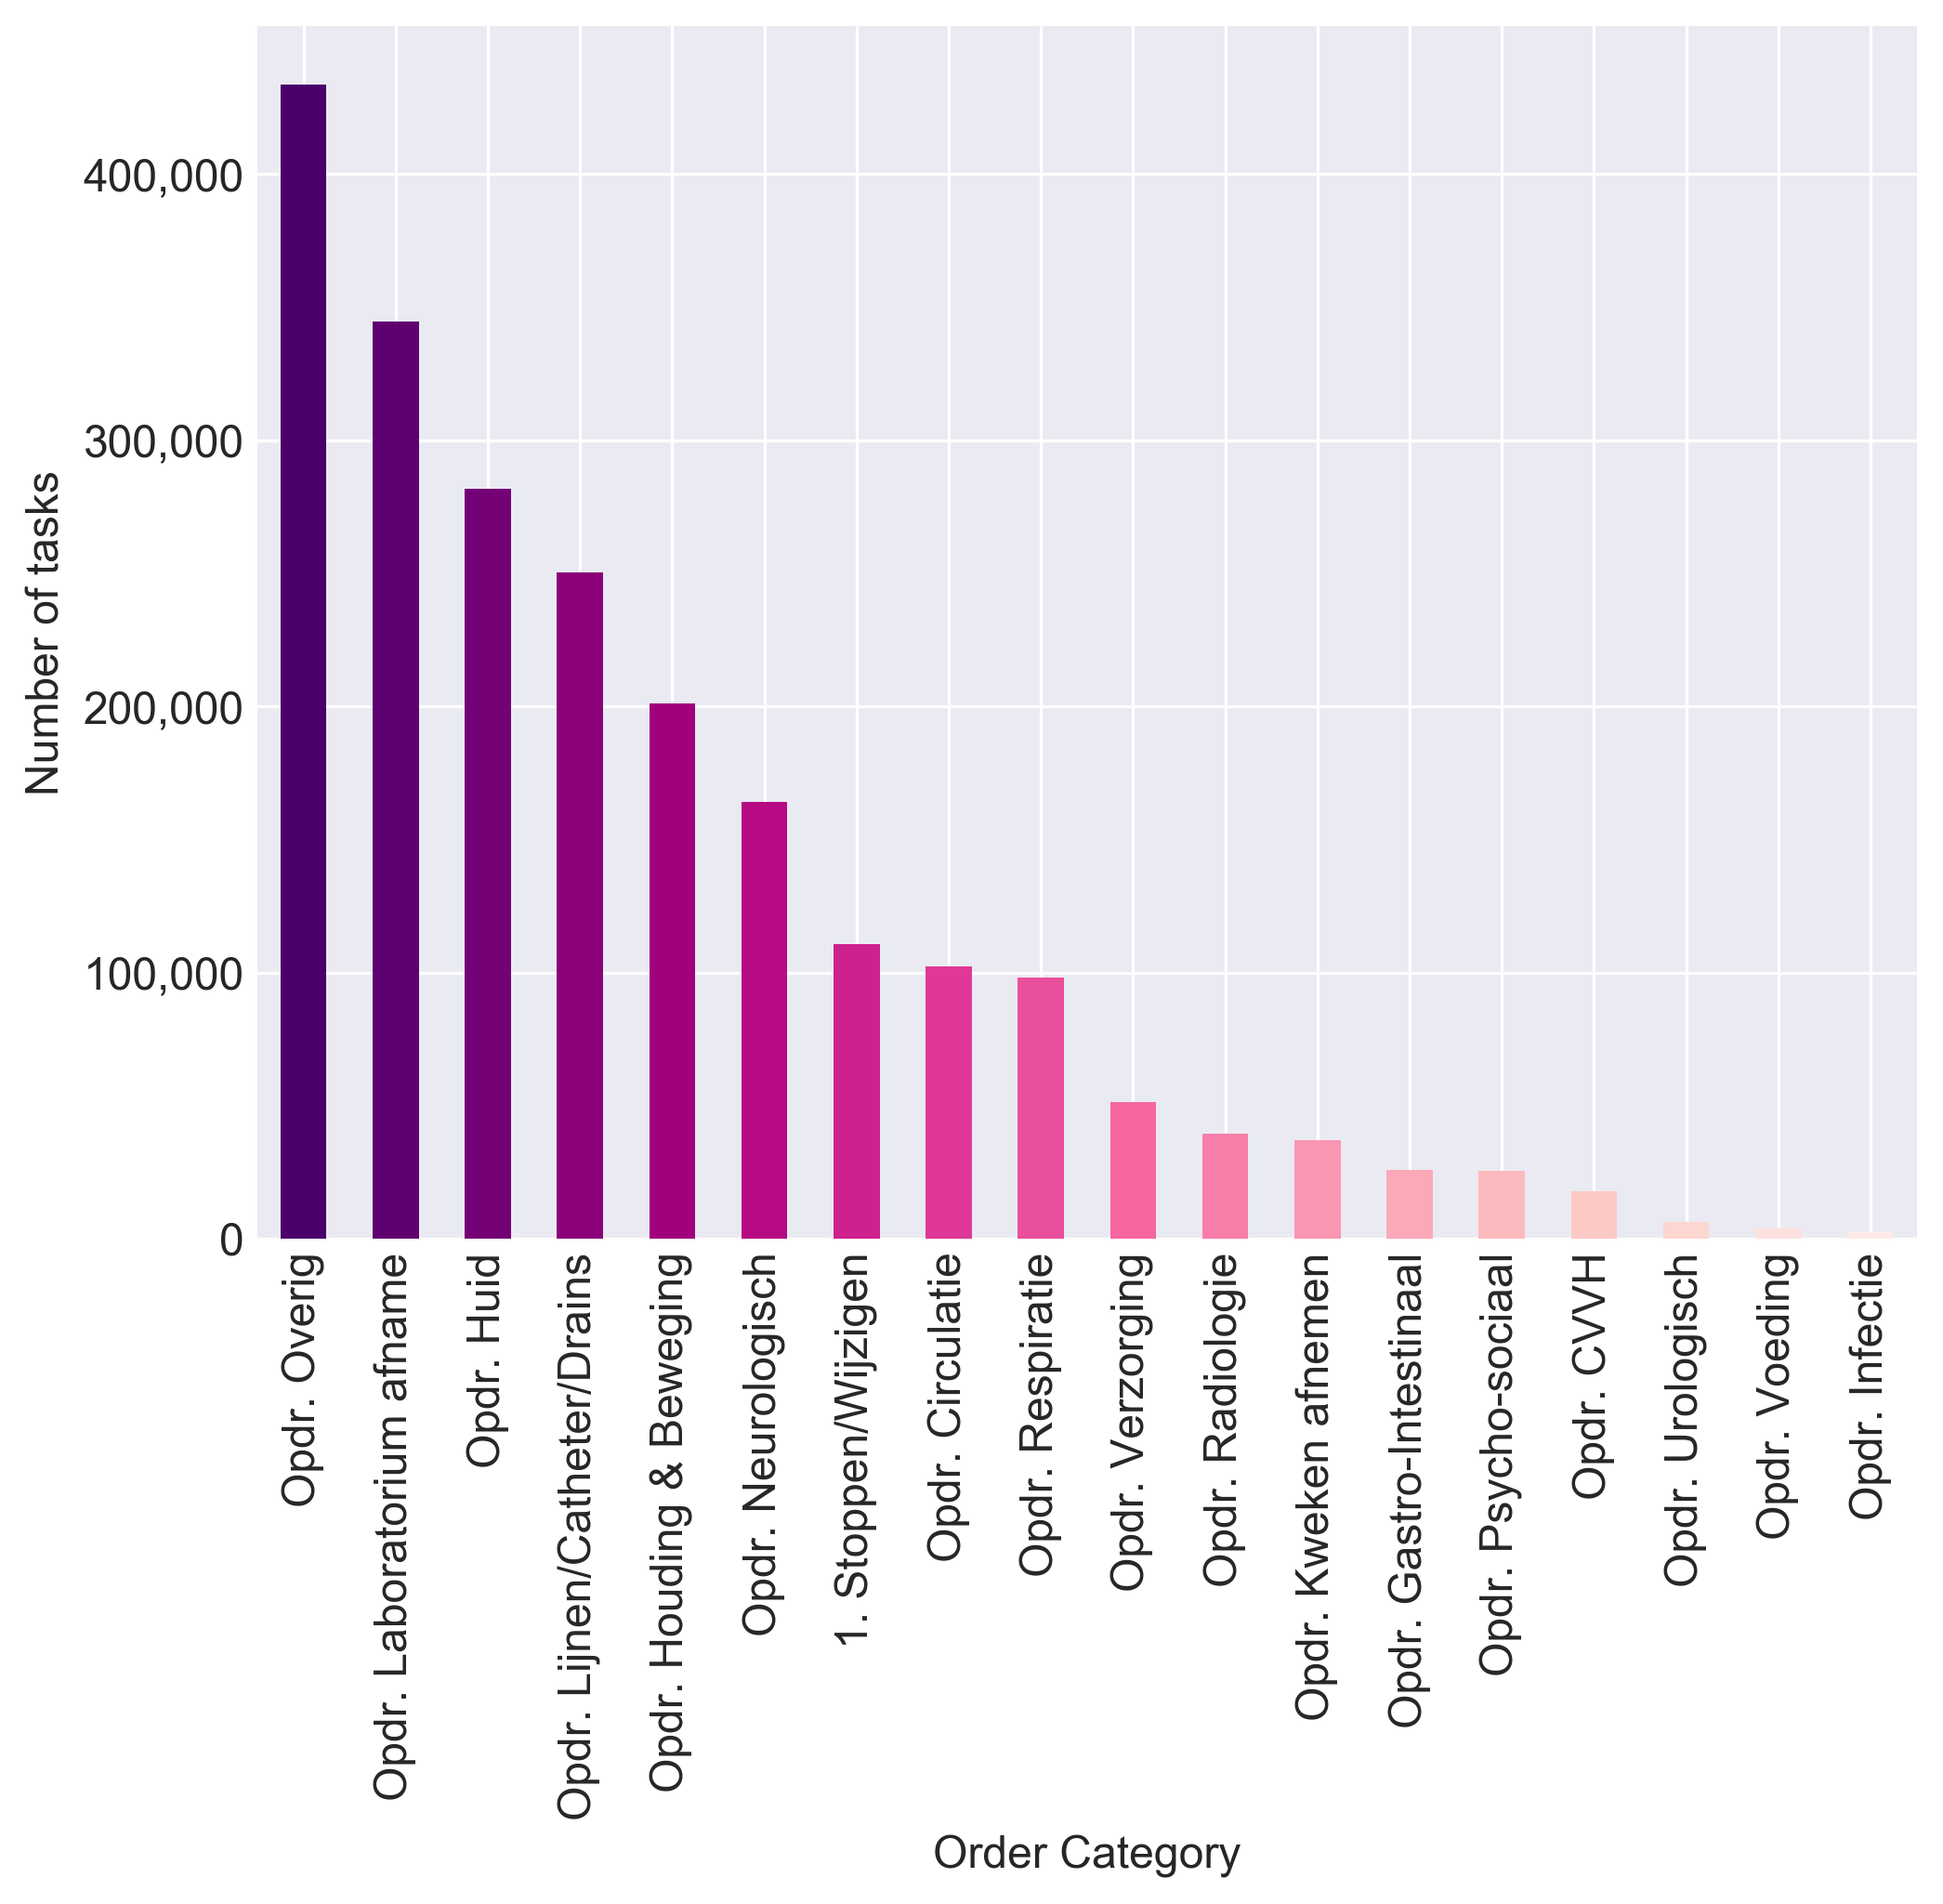

In [9]:
sql = """
SELECT ordercategoryname AS "Order Category", COUNT(ordercategoryname) AS "Number of tasks", ordercategoryid
FROM procedureorderitems
GROUP BY ordercategoryname, ordercategoryid
ORDER BY "Number of tasks" DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# registeredby
Most documentation of the tasks was performed by either the intensive care (IC) or medium care (MC) nurses

``` mysql

SELECT registeredby AS "User group", COUNT(registeredby) AS "Number of tasks"
FROM procedureorderitems
GROUP BY registeredby
ORDER BY "Number of tasks" DESC

```

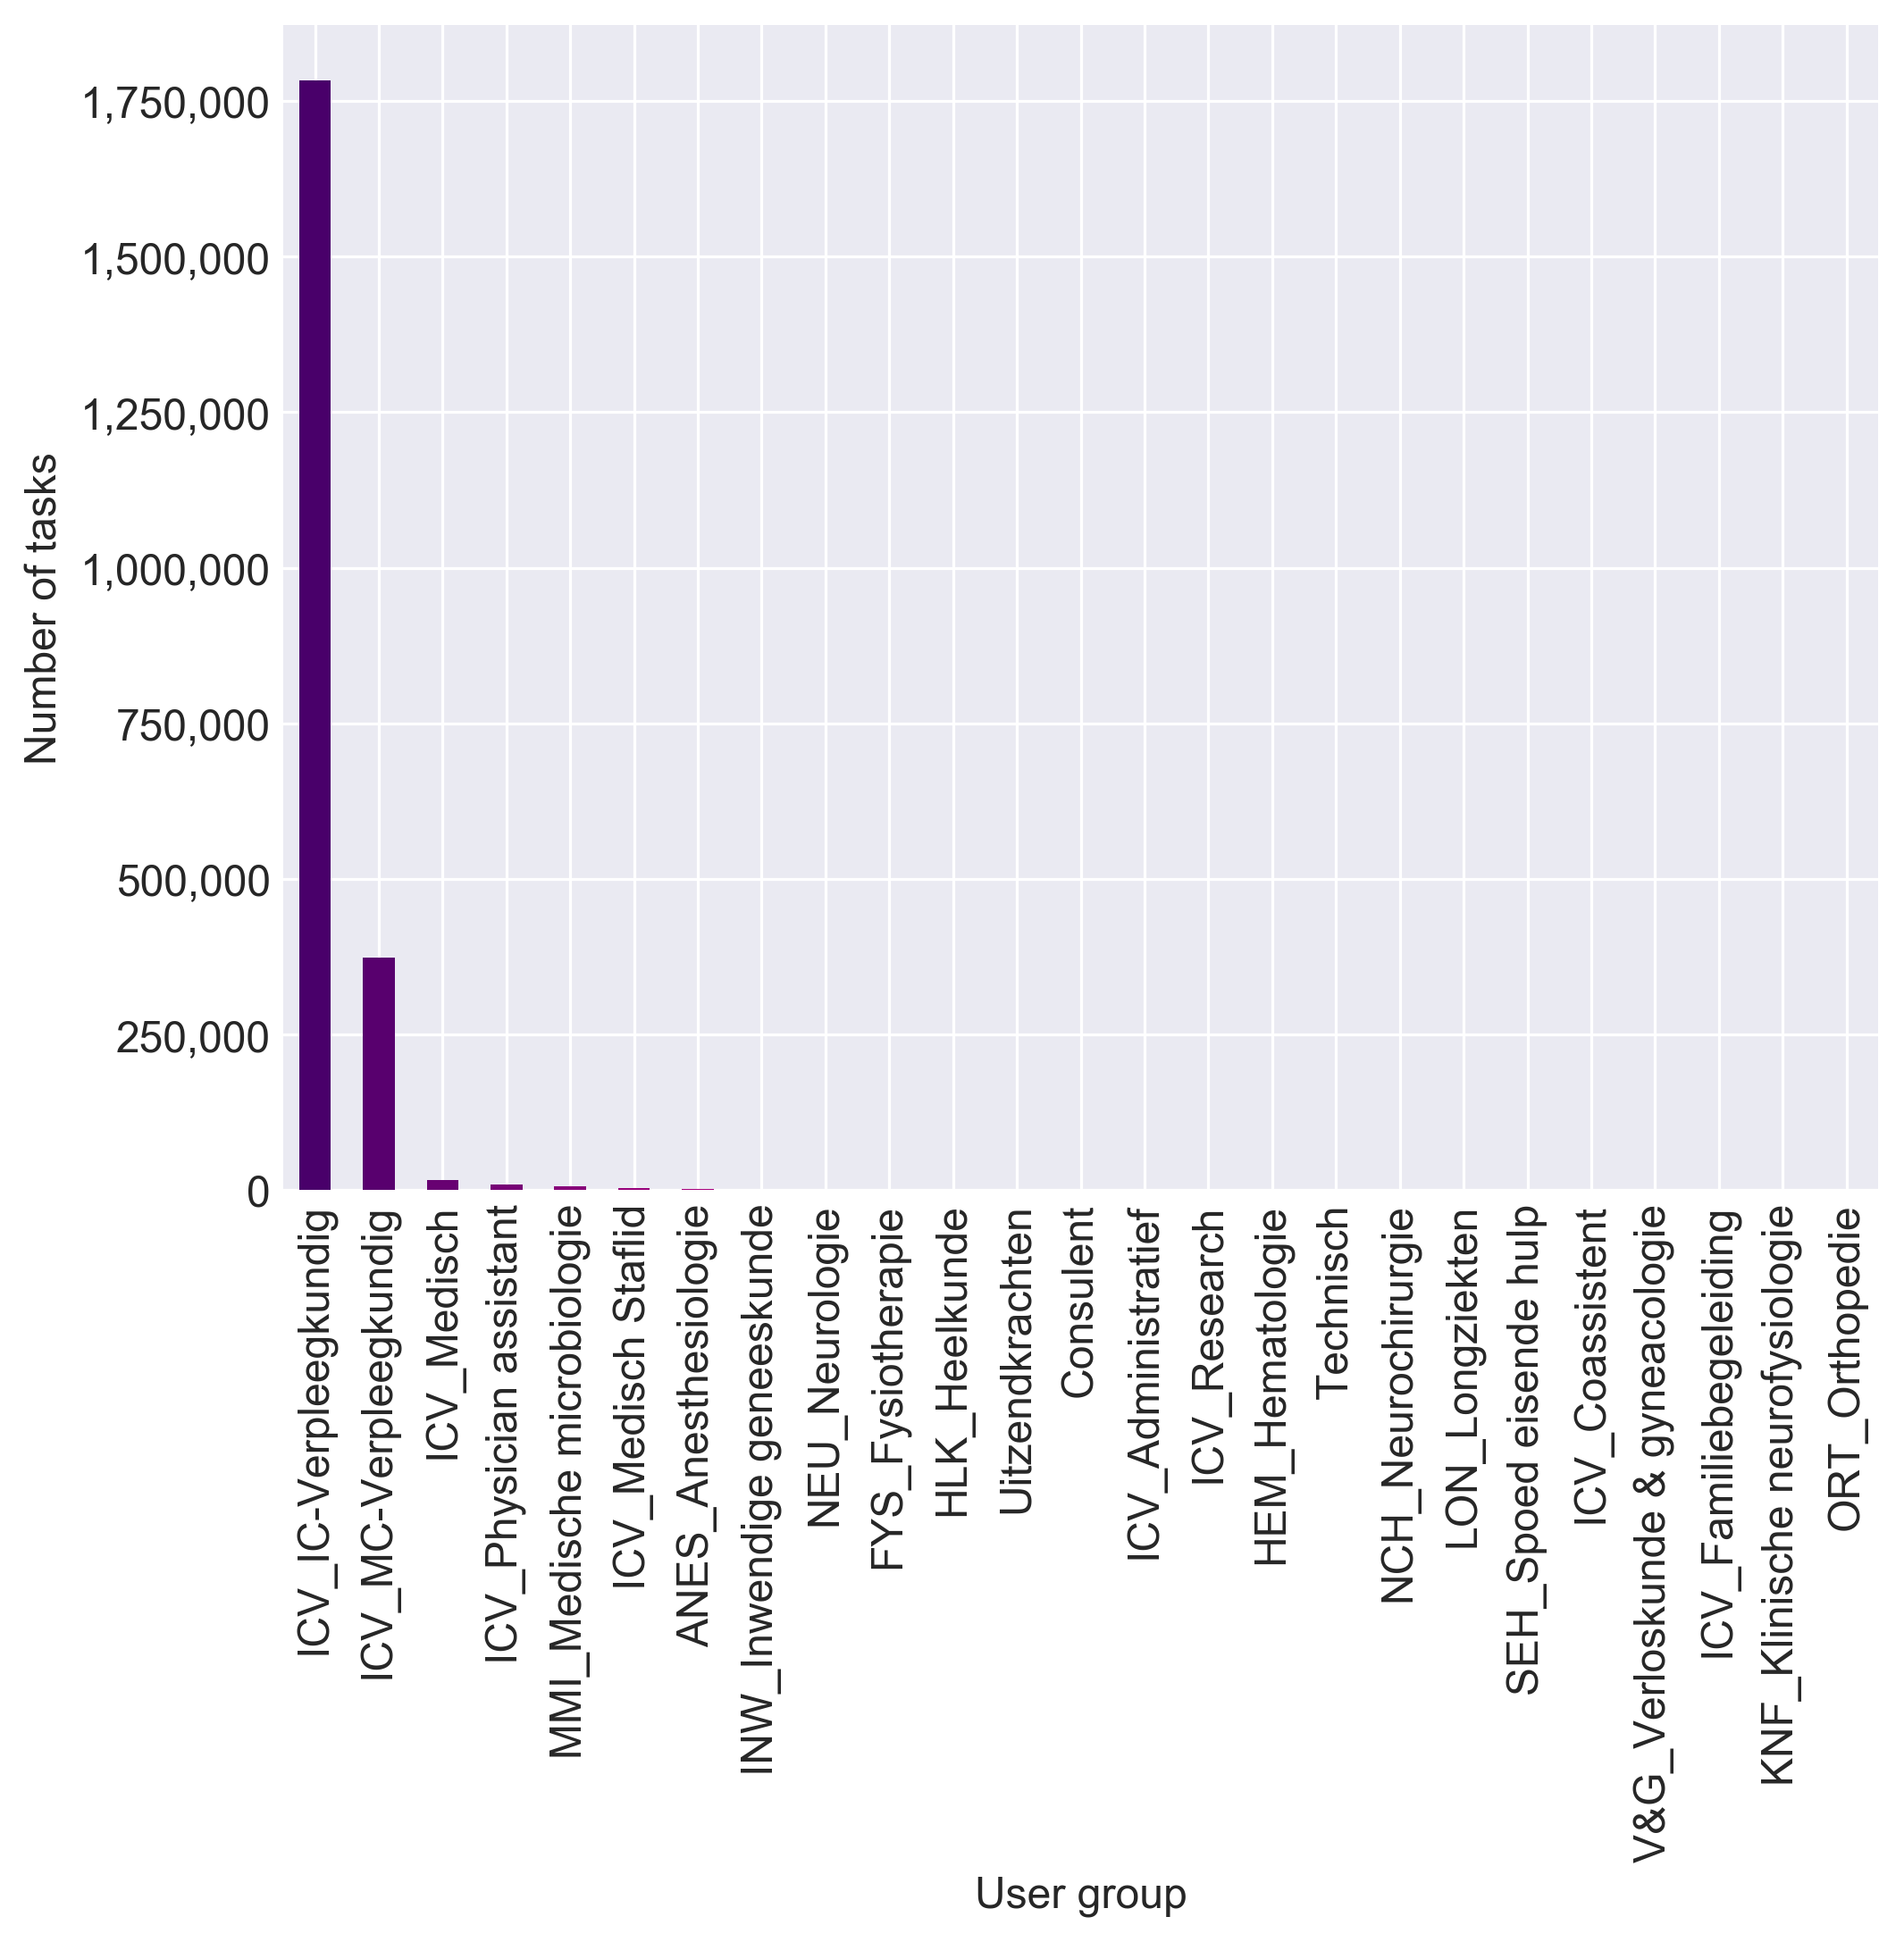

In [10]:
sql = """
SELECT registeredby AS "User group", COUNT(registeredby) AS "Number of tasks"
FROM procedureorderitems
GROUP BY registeredby
ORDER BY "Number of tasks" DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_sql(sql,con)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))